# **``Statistics Assignment-5 (Hypothesis Tests)``**

In [26]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ``EXERCISE 1.`` The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [27]:
# H0: mu = 13.20
# H1: mu < 13.20    

mu = 13.20
s = 2.50
xbar = 12.20

z_score = (mu - xbar) / (s/np.sqrt(40))
z_score


2.5298221281347035

left tail = -2.5298221281347035

In [28]:
upper = 1 - stats.norm.cdf(z_score)
upper

0.005706018193000872

In [29]:
alpha = 0.01

if upper < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


### ``EXERCISE 2.`` Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [30]:
df1 = pd.read_excel("soil.xlsx")
df1

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [31]:
df1.Soil1.isna().sum()

5

In [32]:
df1.Soil2.isna().sum()

0

In [33]:
df1.Soil1.mean()

1.6918

In [34]:
df1.Soil2.mean()

1.4171142857142855

- H0: mu1 = mu2
- H1: mu 1 != mu2

In [35]:
leveneTest = stats.levene(df1.dropna()['Soil1'], df1['Soil2'])
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

We can say that h0 rejected and two groups have different variance

In [36]:
indTest = stats.ttest_ind(df1.dropna()['Soil1'], df1['Soil2'], equal_var=True) # if variances not equal
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [37]:
alpha = 0.01

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


### ``EXERCISE 3.`` The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

- Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
- Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
- CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345


In [38]:
df2 = pd.read_excel("2015 PISA Test.xlsx")
df2

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [39]:
df2.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [43]:
df2.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS          EU          OC  \
internet_users_per_100 count    2.000000   17.000000   37.000000    2.000000   
                       mean    43.359918   68.455613   77.274888   86.391704   
                       std      7.297226   21.086060   12.425773    2.589686   
                       min     38.200000   21.976068   53.744979   84.560519   
                       25%     40.779959   50.300000   68.632900   85.476112   
                       50%     43.359918   74.000000   76.184000   86.391704   
                       75%     45.939877   84.948353   87.479056   87.307296   
                       max     48.519836   92.884826   98.200000   88.222889   
Math                   count    2.000000   17.000000   37.000000    2.000000   
                       mean   363.212100  466.216647  477.981449  494.559750   
                       std      5.099513   64.356490   35.150403    0.938401   
                       min    359.606200  380.259000  371.311400  493.896200   
                       25%    361.409150  403.833200  464.040100  494.227975   
                       50%    363.212100  459.816000  489.728700  494.559750   
                       75%    365.015050  531.296100  503.722000  494.891525   
                       max    366.818000  564.189700  521.250600  495.223300   
Reading                count    2.000000   17.000000   37.000000    2.000000   
                       mean   355.457400  454.059682  476.164608  506.085650   
                       std      7.916909   57.048962   37.720545    4.504341   
                       min    349.859300  346.549000  351.741500  502.900600   
                       25%    352.658350  408.102200  452.514300  504.493125   
                       50%    355.457400  433.542300  487.250100  506.085650   
                       75%    358.256450  508.690500  499.814600  507.678175   
                       max    361.055500  535.100200  526.424700  509.270700   
Science                count    2.000000   17.000000   37.000000    2.000000   
                       mean   381.074250  467.945847  478.299381  511.648700   
                       std      7.536556   56.671371   34.450616    2.340241   
                       min    375.745100  386.485400  383.682400  509.993900   
                       25%    378.409675  417.611200  460.774900  510.821300   
                       50%    381.074250  456.483600  490.225000  511.648700   
                       75%    383.738825  523.277400  501.936900  512.476100   
                       max    386.403400  555.574700  534.193700  513.303500   

Continent_Code                        SA  
internet_users_per_100 count    7.000000  
                       mean    60.180494  
                       std      9.772455  
                       min     40.900000  
                       25%     57.116462  
                       50%     64.289000  
                       75%     66.321532  
                       max     69.198471  
Math                   count    7.000000  
                       mean   402.887700  
                       std     18.128894  
                       min    377.069500  
                       25%    388.102200  
                       50%    409.033300  
                       75%    417.617650  
                       max    422.671400  
Reading                count    7.000000  
                       mean   425.359229  
                       std     19.709688  
                       min    397.541400  
                       25%    416.126900  
                       50%    425.303100  
                       75%    431.922700  
                       max    458.570900  
Science                count    7.000000  
                       mean   421.747186  
                       std     18.470319  
                       min    396.683600  
                       25%    408.205450  
                       50%    424.590500  
                       75%

In [44]:
df2.groupby("Continent_Code").mean()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


In [45]:
df2.groupby('Continent_Code').median()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.21210,355.45740,381.07425
AS,74.000000,459.81600,433.54230,456.48360
EU,76.184000,489.72870,487.25010,490.22500
OC,86.391704,494.55975,506.08565,511.64870
SA,64.289000,409.03330,425.30310,424.59050


In [46]:
df2.groupby('Continent_Code').std()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,7.297226,5.099513,7.916909,7.536556
AS,21.086060,64.356490,57.048962,56.671371
EU,12.425773,35.150403,37.720545,34.450616
OC,2.589686,0.938401,4.504341,2.340241
SA,9.772455,18.128894,19.709688,18.470319


In [47]:
df2.groupby('Continent_Code').var()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,53.249507,26.005030,62.677447,56.799679
AS,444.621918,4141.757822,3254.584049,3211.644321
EU,154.399841,1235.550805,1422.839540,1186.844969
OC,6.706475,0.880597,20.289087,5.476726
SA,95.500869,328.656783,388.471816,341.152678


In [48]:
df2.groupby('Continent_Code').skew()

C:\Users\gbaha\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:937: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(x, *args, **kwargs)


,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,NaN,NaN,NaN,NaN
AS,-0.775229,0.144656,-0.099169,0.135810
EU,-0.049351,-1.245494,-1.325443,-0.881399
OC,NaN,NaN,NaN,NaN
SA,-1.469258,-0.372256,0.325499,-0.207071


### The skewness values can be interpreted in the following manner:

- **``Highly skewed distribution:``** If the skewness value is less than −1 or greater than +1.

- **``Moderately skewed distribution:``** If the skewness value is between −1 and −½ or between +½ and +1.

- **``Approximately symmetric distribution:``** If the skewness value is between −½ and +½.

In [49]:
dfmath = df2.groupby("Continent_Code").describe()["Math"]
dfmath

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


### Math

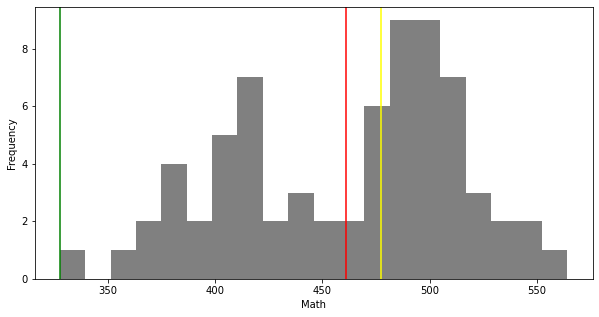

In [71]:
mean = df2.Math.mean()
median = df2.Math.median()
mode = df2.Math.mode()

plt.figure(figsize=(10,5))
plt.hist(df2.Math,bins=20,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Math')
plt.ylabel('Frequency')
plt.show()

### Reading

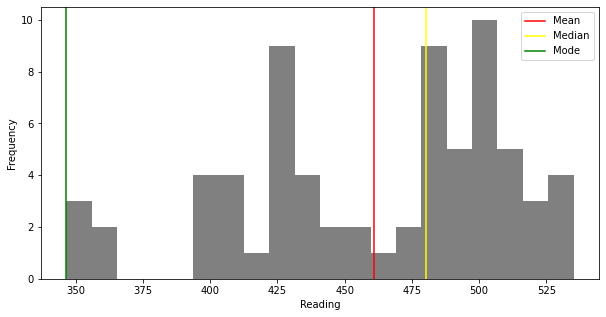

In [51]:
mean = df2.Reading.mean()
median = df2.Reading.median()
mode = df2.Reading.mode()

plt.figure(figsize=(10,5))
plt.hist(df2.Reading,bins=20,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Reading')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Science

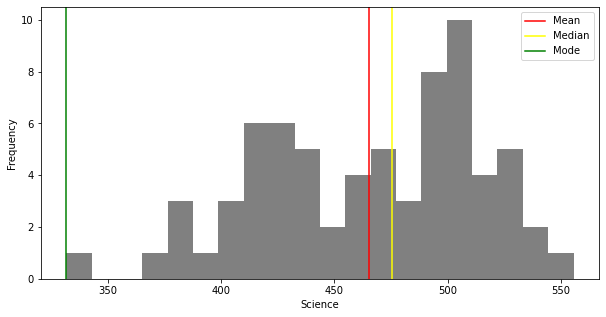

In [52]:
mean = df2.Science.mean()
median = df2.Science.median()
mode = df2.Science.mode()

plt.figure(figsize=(10,5))
plt.hist(df2.Science,bins=20,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Science')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [53]:
df2[(df2['Continent_Code'] == "AS") | (df2['Continent_Code'] == "EU")][['Math','Continent_Code']]

,Math,Continent_Code
0,413.1570,EU
1,427.4827,AS
4,496.7423,EU
5,506.9844,EU
6,441.1899,EU
9,521.2506,EU
11,531.2961,AS
14,437.1443,EU
15,492.3254,EU
16,505.9713,EU


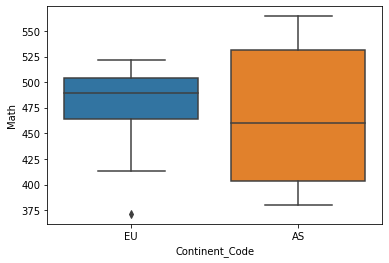

In [54]:
sns.boxplot(y='Math', x='Continent_Code', data = df2[(df2['Continent_Code'] == "AS") | (df2['Continent_Code'] == "EU")][['Math','Continent_Code']]);

In [55]:
EU = df2[df2['Continent_Code'] == "EU"]['Math']
EU

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

In [56]:
AS = df2[df2['Continent_Code'] == "AS"]['Math']
AS

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

- H0: mu1 = mu2
- H1: mu1 != mu2

In [57]:
indTest = stats.ttest_ind(EU, AS,equal_var=True)
indTest

Ttest_indResult(statistic=0.8700553179679787, pvalue=0.38826888111307556)

In [58]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


### ``EXERCISE 4.`` The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [59]:
df3 = pd.read_excel("students_2014.xlsx")
df3.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783.0,1995-03-22,NaT,NaT,NaN,NaN,0.0,0.0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278.0,1995-01-01,NaT,NaT,NaN,Philosophy,0.0,0.0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389.0,1994-12-31,NaT,NaT,NaN,NaN,0.0,0.0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820.0,1994-12-01,NaT,NaT,NaN,business administration,1.0,0.0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559.0,1994-11-10,NaT,NaT,NaN,NaN,1.0,1.0,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [60]:
df3.isnull().sum()

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64

In [61]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
ids,435.0,35279.022989,8637.733605,20183.000,28001.0000,35350.000,42655.5000,49947.000
Rank,406.0,2.199507,1.098641,1.000,1.0000,2.000,3.0000,4.000
Gender,426.0,0.521127,0.500141,0.000,0.0000,1.000,1.0000,1.000
Athlete,435.0,0.422989,0.494602,0.000,0.0000,0.000,1.0000,1.000
Height,408.0,68.031765,5.325655,55.000,64.8275,67.570,71.5750,84.410
Weight,376.0,181.031569,42.749680,101.710,153.8600,172.960,204.3075,350.070
Smoking,411.0,0.430657,0.766324,0.000,0.0000,0.000,1.0000,2.000
Sprint,374.0,6.581933,1.227069,4.503,5.5875,6.569,7.4580,9.597
English,409.0,82.787555,6.839803,59.830,78.3300,83.150,87.1700,101.950
Reading,425.0,82.070800,7.661778,55.110,77.1900,81.940,87.0800,103.620


In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ids           435 non-null    float64       
 1   bday          427 non-null    datetime64[ns]
 2   enrolldate    406 non-null    datetime64[ns]
 3   expgradate    406 non-null    datetime64[ns]
 4   Rank          406 non-null    float64       
 5   Major         276 non-null    object        
 6   Gender        426 non-null    float64       
 7   Athlete       435 non-null    float64       
 8   Height        408 non-null    float64       
 9   Weight        376 non-null    float64       
 10  Smoking       411 non-null    float64       
 11  Sprint        374 non-null    float64       
 12  MileMinDur    392 non-null    object        
 13  English       409 non-null    float64       
 14  Reading       425 non-null    float64       
 15  Math          422 non-null    float64   

- H0: avg = 0 
- H1: avg != 0  (math_avg - english_avg)

In [63]:
pairedtest = stats.ttest_rel(df3.Math, df3.English, nan_policy='omit',alternative='two-sided')
pairedtest

Ttest_relResult(statistic=-36.31256898171986, pvalue=3.0710987192208863e-128)

There was a significant average difference between English and Math scores (value = 3.071098719220689e-128, p < 0.001).